In [1]:
import glob
import csv
import re  # Import the regular expressions module
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:


# Read progress data from CSV files and store them into lists
csv_files = glob.glob('progress/progress_*.csv')

# Create empty lists to store data from all files
perfect_pro = []
imperfect_pro = []
non_recover_pro = []
recover_pro = []
error_pro = []
challenge_pro = []
effective_pro = []
alternative_pro = []
confused_pro = []
easy_pro = []




# Loop through each file
for csv_file in csv_files:
    arrays_from_csv = []
    sentences_from_csv = []
    # Open and read the CSV file
    with open(csv_file, 'r') as file:
        for row in file:
            # Check if the first element can be converted to an integer
            try:
                int(row[0])
                is_numeric = True
            except ValueError:
                is_numeric = False
            
            if is_numeric:
                line = re.split('[ ,]', row.strip())
                arrays_from_csv.append([int(x) for x in line])
            else:
                sentences_from_csv.append(row)
                
    perfect_pro.append(arrays_from_csv[0])
    imperfect_pro.append(arrays_from_csv[1])
    non_recover_pro.append(arrays_from_csv[2])
    recover_pro.append(arrays_from_csv[3])
    error_pro.append(arrays_from_csv[4])
    challenge_pro.append(arrays_from_csv[5])
    effective_pro.append(arrays_from_csv[6])
    alternative_pro.append(arrays_from_csv[7])
    confused_pro.append(sentences_from_csv[0])
    easy_pro.append(sentences_from_csv[1])

print("perfect_pro: ", perfect_pro)
print("confused_pro:", confused_pro)
print("easy_pro: ", easy_pro)


perfect_pro:  [[0, 10, 25, 10, 0, 0, 10, 10, 10, 10, 5, 5, 3, 2, 3], [20, 30, 50, 55, 70, 80, 85, 95, 96, 97, 98, 99, 99, 99, 100], [20, 20, 25, 30, 35, 40, 45, 55, 58, 70, 78, 88, 97, 100, 100], [5, 7, 15, 17, 19, 20, 22, 25, 25, 27, 30, 45, 60, 70, 90], [10, 5, 20, 30, 35, 45, 50, 53, 65, 68, 70, 80, 90, 95, 100], [20, 20, 35, 35, 40, 50, 55, 65, 65, 70, 70, 75, 80, 80, 90], [10, 100, 90, 70, 80, 100, 30, 70, 90, 40, 60, 20, 40, 50, 60], [20, 27, 35, 38, 39, 40, 50, 56, 58, 73, 78, 85, 82, 98, 100], [30, 38, 70, 78, 79, 85, 88, 90, 92, 98, 92, 48, 59, 60, 78], [15, 18, 60, 65, 75, 85, 87, 90, 91, 92, 93, 96, 98, 99, 99], [20, 18, 25, 35, 37, 40, 48, 55, 60, 65, 74, 85, 100, 100, 100], [25, 25, 40, 45, 48, 50, 55, 60, 74, 80, 90, 95, 100, 100, 100], [30, 35, 60, 70, 75, 85, 87, 90, 93, 95, 96, 97, 100, 100, 100], [20, 20, 25, 30, 32, 40, 45, 55, 59, 70, 75, 80, 100, 100, 100], [20, 0, 50, 80, 50, 100, 50, 80, 90, 80, 50, 80, 100, 100, 100], [20, 25, 25, 40, 50, 60, 70, 80, 85, 90, 95,

In [3]:
csv_files = glob.glob('preference/progress_*.csv')

# Create empty lists to store data from all files
perfect_pre = []
imperfect_pre = []
non_recover_pre = []
recover_pre = []
error_pre = []
challenge_pre = []
effective_pre = []
alternative_pre = []
confused_pre = []
easy_pre = []

# Loop through each file
for csv_file in csv_files:
    arrays_from_csv = []
    sentences_from_csv = []
    # Open and read the CSV file
    with open(csv_file, 'r') as file:
        for row in file:
            # Check if the first element can be converted to an integer
            try:
                int(row[0])
                is_numeric = True
            except ValueError:
                is_numeric = False
            
            if is_numeric:
                line = re.split('[ ,]', row.strip())
                arrays_from_csv.append([int(x) for x in line])
            else:
                sentences_from_csv.append(row)
                
    perfect_pre.append(arrays_from_csv[0])
    imperfect_pre.append(arrays_from_csv[1])
    non_recover_pre.append(arrays_from_csv[2])
    recover_pre.append(arrays_from_csv[3])
    error_pre.append(arrays_from_csv[4])
    challenge_pre.append(arrays_from_csv[5])
    effective_pre.append(arrays_from_csv[6])
    alternative_pre.append(arrays_from_csv[7])
    confused_pre.append(sentences_from_csv[0])
    easy_pre.append(sentences_from_csv[1])

18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18


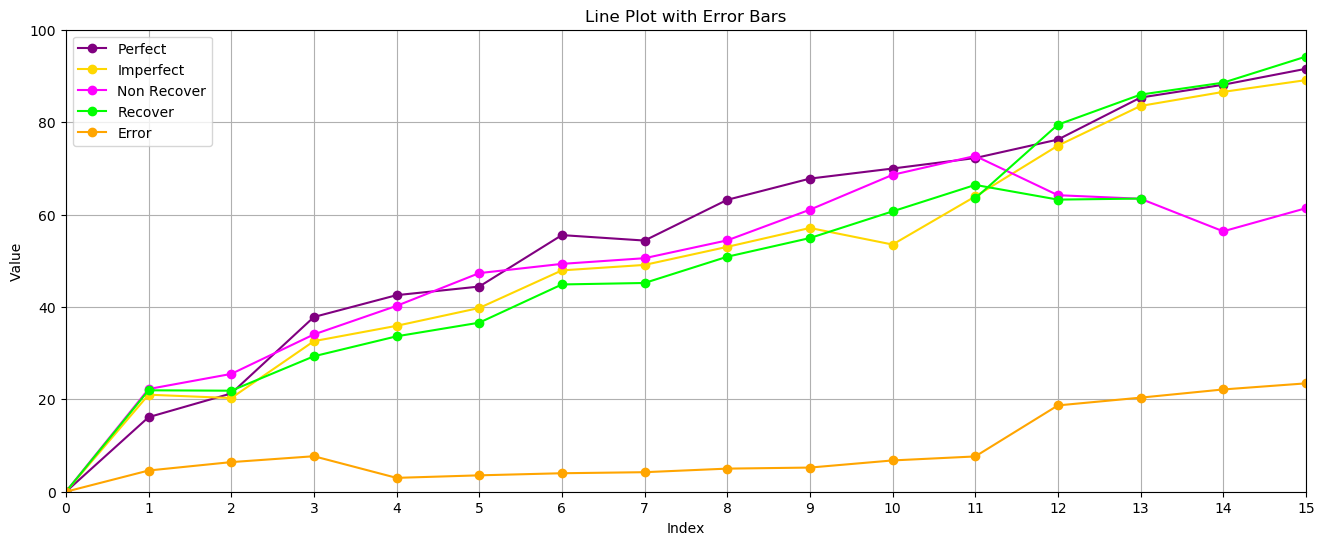

In [4]:
print(len(perfect_pro))

# Function to calculate mean and standard deviation
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Calculate mean and standard deviation for each category
mean_perfect, std_perfect = calc_mean_std(perfect_pro)
mean_imperfect, std_imperfect = calc_mean_std(imperfect_pro)
mean_non_recover, std_non_recover = calc_mean_std(non_recover_pro)
mean_recover, std_recover = calc_mean_std(recover_pro)
mean_error, std_error = calc_mean_std(error_pro)

# Create the line plot
plt.figure(figsize=(16, 6))

# Adding a zero at the beginning and shifting the line one point to the right
def shift_and_prepend_zero(data):
    return [0] + list(data)

# Plotting without error bars, using fancy colors
plt.plot(range(len(mean_perfect)+1), shift_and_prepend_zero(mean_perfect), label='Perfect', linestyle='-', marker='o', color='purple')
plt.plot(range(len(mean_imperfect)+1), shift_and_prepend_zero(mean_imperfect), label='Imperfect', linestyle='-', marker='o', color='gold')
plt.plot(range(len(mean_non_recover)+1), shift_and_prepend_zero(mean_non_recover), label='Non Recover', linestyle='-', marker='o', color='magenta')

# Split the data at index 11 for recover_pro
x_values1 = [0] + list(range(1, 14))  # shifted by 1 to the right
 # shifted by 1 to the right
y_values1 = shift_and_prepend_zero(mean_recover[:13])

x_values2 = list(range(11, 11 + len(mean_recover[13:])))  # shifted by 1 to the right
y_values2 = mean_recover[13:]

plt.plot(x_values1, y_values1, linestyle='-', marker='o', color='lime')
plt.plot(x_values2, y_values2, linestyle='-', marker='o', color='lime', label='Recover')

plt.plot(range(len(mean_error)+1), shift_and_prepend_zero(mean_error), label='Error', linestyle='-', marker='o', color='orange')





# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot with Error Bars')
plt.ylim(0, 100)
# Set the x-axis limits and ticks
plt.xlim(0, 15)
plt.xticks(range(0, 16))

plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18


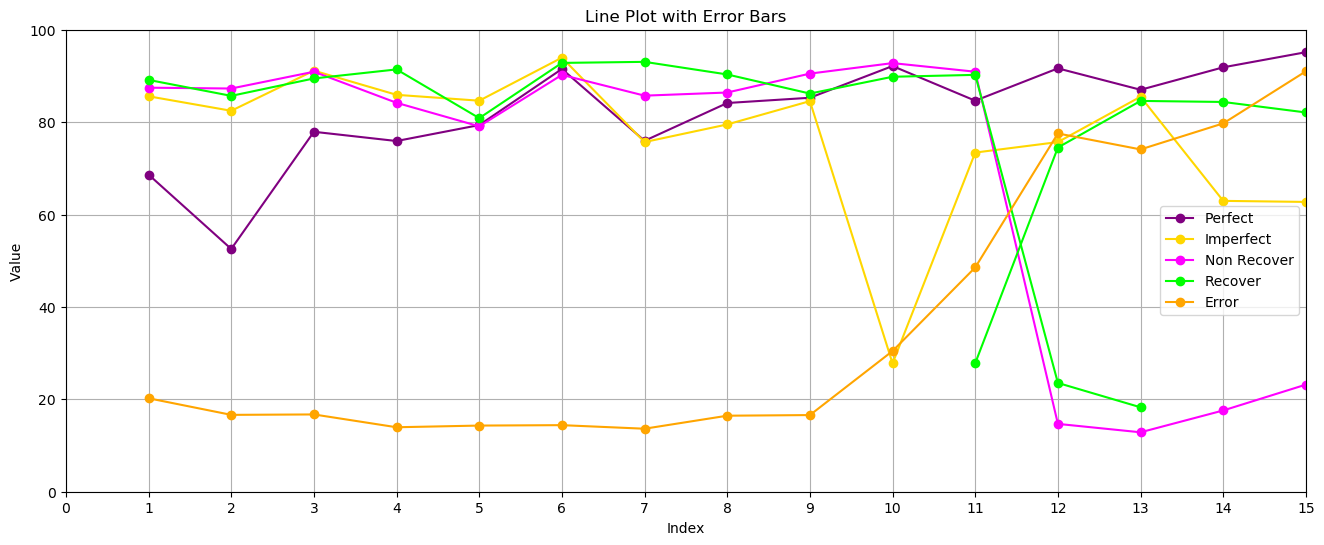

In [5]:
print(len(perfect_pre))
# Function to calculate mean and standard deviation
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Adding a zero at the beginning and shifting the line one point to the right
def shift_and_prepend_zero(data):
    return [0] + list(data)

# Create the line plot
plt.figure(figsize=(16, 6))


# Calculate mean and standard deviation for each *_pre category
mean_perfect_pre, std_perfect_pre = calc_mean_std(perfect_pre)
mean_imperfect_pre, std_imperfect_pre = calc_mean_std(imperfect_pre)
mean_non_recover_pre, std_non_recover_pre = calc_mean_std(non_recover_pre)
mean_recover_pre, std_recover_pre = calc_mean_std(recover_pre)
mean_error_pre, std_error_pre = calc_mean_std(error_pre)

# Plotting without error bars, using fancy colors
plt.plot(range(1, len(mean_perfect_pre)+1), mean_perfect_pre, label='Perfect', linestyle='-', marker='o', color='purple')
plt.plot(range(1, len(mean_imperfect_pre)+1), mean_imperfect_pre, label='Imperfect', linestyle='-', marker='o', color='gold')
plt.plot(range(1, len(mean_non_recover_pre)+1), mean_non_recover_pre, label='Non Recover', linestyle='-', marker='o', color='magenta')

# Split the data at index 11 for recover_pro
x_values1 = list(range(1, 14))  # shifted by 1 to the right
y_values1 = mean_recover_pre[:13]

x_values2 = list(range(11, 11 + len(mean_recover_pre[13:])))  # shifted by 1 to the right
y_values2 = mean_recover_pre[13:]

plt.plot(x_values1, y_values1, linestyle='-', marker='o', color='lime')
plt.plot(x_values2, y_values2, linestyle='-', marker='o', color='lime', label='Recover')

plt.plot(range(1, len(mean_error_pre)+1), mean_error_pre, label='Error', linestyle='-', marker='o', color='orange')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot with Error Bars')
plt.ylim(0, 100)
# Set the x-axis limits and ticks
plt.xlim(0, 15)
plt.xticks(range(0, 16))

plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()




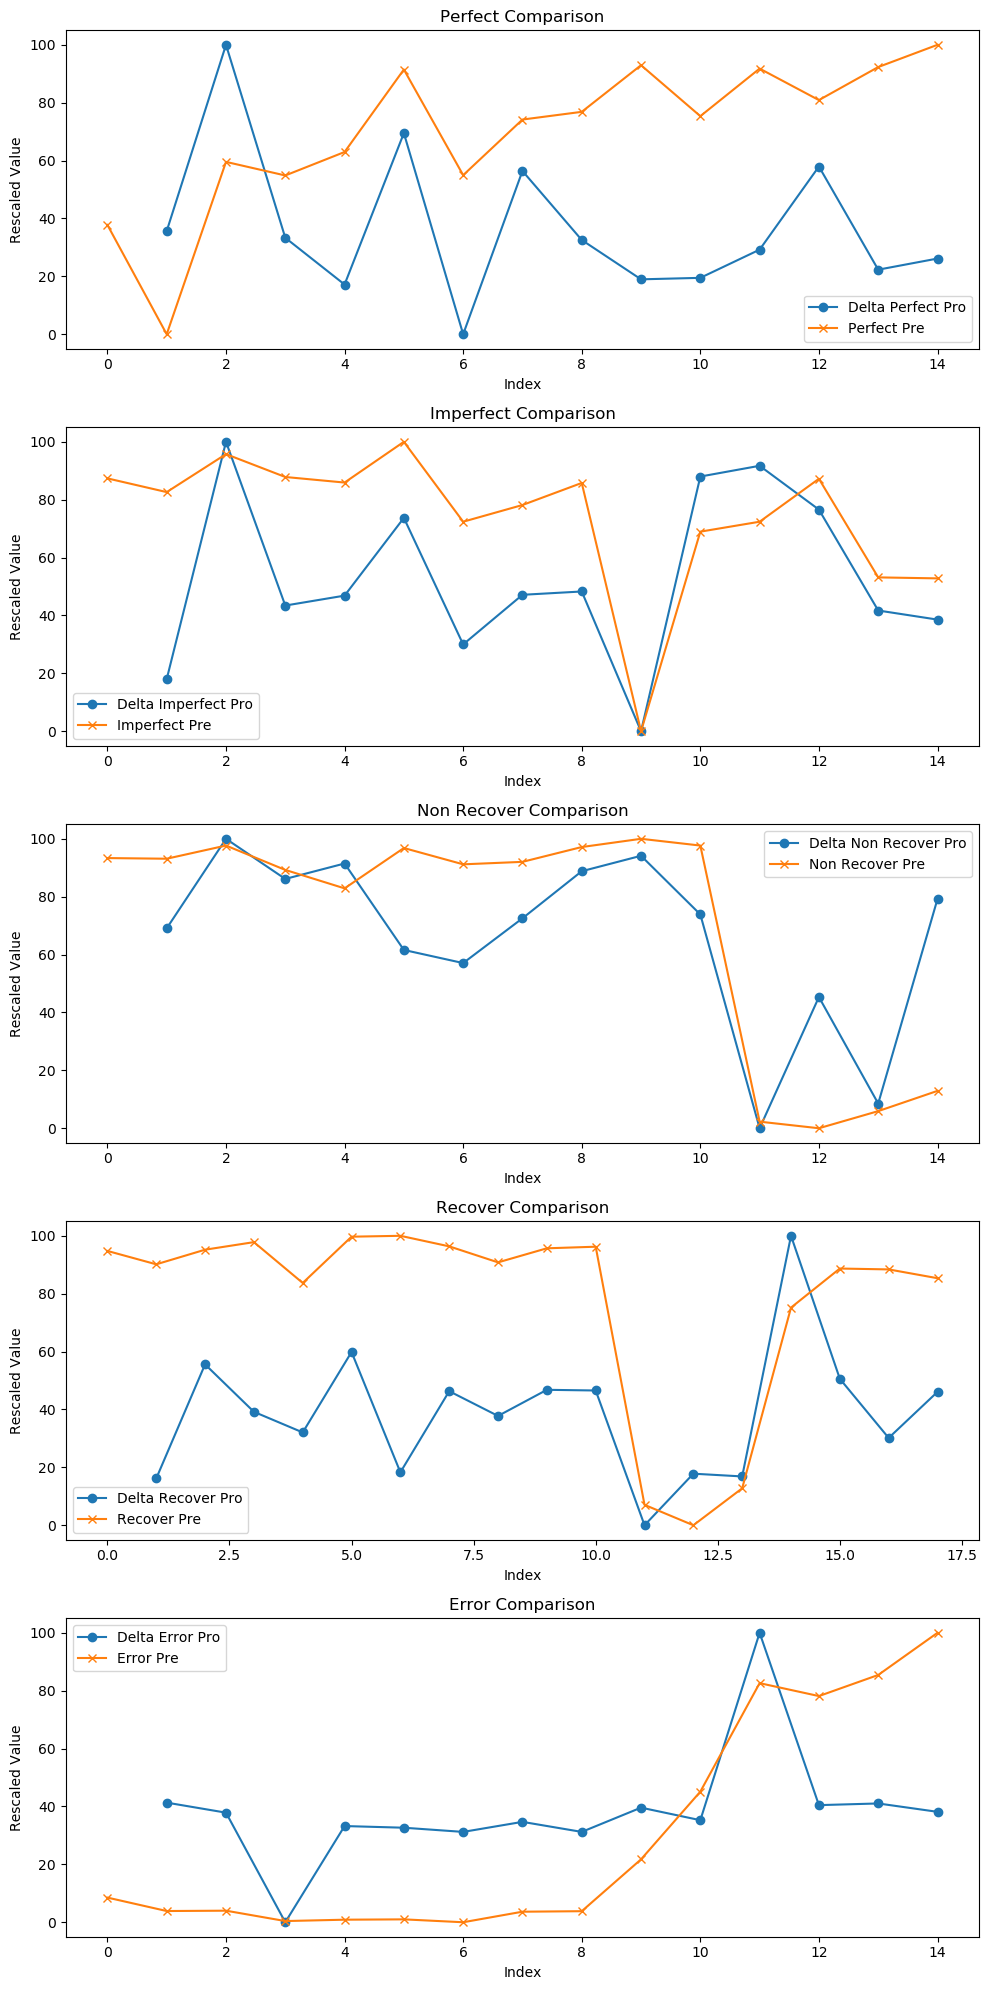

In [6]:
# Your existing calc_mean_std function
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Min-Max scaling function
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val) * 100


# Calculate mean for each *_pro and *_pre category
mean_perfect_pro, _ = calc_mean_std(perfect_pro)
mean_imperfect_pro, _ = calc_mean_std(imperfect_pro)
mean_non_recover_pro, _ = calc_mean_std(non_recover_pro)
mean_recover_pro, _ = calc_mean_std(recover_pro)
mean_error_pro, _ = calc_mean_std(error_pro)

mean_perfect_pre, _ = calc_mean_std(perfect_pre)
mean_imperfect_pre, _ = calc_mean_std(imperfect_pre)
mean_non_recover_pre, _ = calc_mean_std(non_recover_pre)
mean_recover_pre, _ = calc_mean_std(recover_pre)
mean_error_pre, _ = calc_mean_std(error_pre)

# Calculate the delta (difference between adjacent mean values)
delta_mean_perfect_pro = np.diff(mean_perfect_pro)
delta_mean_imperfect_pro = np.diff(mean_imperfect_pro)
delta_mean_non_recover_pro = np.diff(mean_non_recover_pro)
delta_mean_recover_pro = np.diff(mean_recover_pro)
delta_mean_error_pro = np.diff(mean_error_pro)

# Rescale the delta and *_pre means
rescaled_delta_perfect_pro = min_max_scaling(delta_mean_perfect_pro)
rescaled_delta_imperfect_pro = min_max_scaling(delta_mean_imperfect_pro)
rescaled_delta_non_recover_pro = min_max_scaling(delta_mean_non_recover_pro)
rescaled_delta_recover_pro = min_max_scaling(delta_mean_recover_pro)
rescaled_delta_error_pro = min_max_scaling(delta_mean_error_pro)

rescaled_mean_perfect_pre = min_max_scaling(mean_perfect_pre)
rescaled_mean_imperfect_pre = min_max_scaling(mean_imperfect_pre)
rescaled_mean_non_recover_pre = min_max_scaling(mean_non_recover_pre)
rescaled_mean_recover_pre = min_max_scaling(mean_recover_pre)
rescaled_mean_error_pre = min_max_scaling(mean_error_pre)

# Create the 5x1 subplot
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Plotting the rescaled delta mean values and *_pre means
categories = ['Perfect', 'Imperfect', 'Non Recover', 'Recover', 'Error']
rescaled_deltas = [rescaled_delta_perfect_pro, rescaled_delta_imperfect_pro, rescaled_delta_non_recover_pro, rescaled_delta_recover_pro, rescaled_delta_error_pro]
rescaled_pres = [rescaled_mean_perfect_pre, rescaled_mean_imperfect_pre, rescaled_mean_non_recover_pre, rescaled_mean_recover_pre, rescaled_mean_error_pre]

for i in range(5):
    axs[i].plot(range(1, len(rescaled_deltas[i]) + 1), rescaled_deltas[i], label=f'Delta {categories[i]} Pro', linestyle='-', marker='o')
    axs[i].plot(range(len(rescaled_pres[i])), rescaled_pres[i], label=f'{categories[i]} Pre', linestyle='-', marker='x')
    
    # if categories[i] == 'Recover':
    #     axs[i].plot(range(11, 14), rescaled_deltas[i][13:16], linestyle='-', marker='o', color=axs[i].lines[0].get_color())  # Overlapping section
    
    axs[i].set_title(f'{categories[i]} Comparison')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Rescaled Value')
    axs[i].legend()

plt.tight_layout()
plt.show()





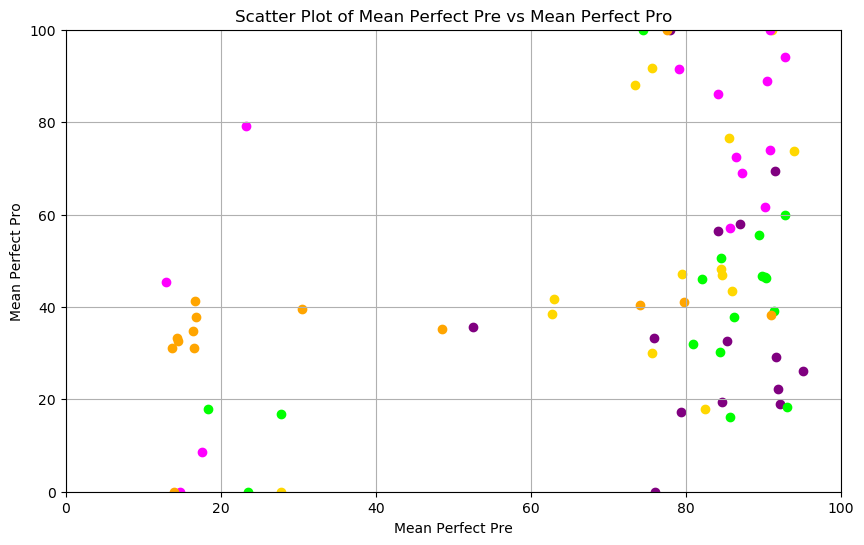

In [7]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(mean_perfect_pre[1:],   rescaled_delta_perfect_pro, label='Perfect', marker='o', color='purple')
plt.scatter(mean_imperfect_pre[1:], rescaled_delta_imperfect_pro, label='Imperfect', marker='o', color='gold')
plt.scatter(mean_non_recover_pre[1:], rescaled_delta_non_recover_pro, label='Non Recover', marker='o', color='magenta')
plt.scatter(mean_recover_pre[1:], rescaled_delta_recover_pro, label='Recover', marker='o', color='lime')
plt.scatter(mean_error_pre[1:], rescaled_delta_error_pro, label='Error', marker='o', color='orange')




# Add labels and title
plt.xlabel('Mean Perfect Pre')
plt.ylabel('Mean Perfect Pro')
plt.title('Scatter Plot of Mean Perfect Pre vs Mean Perfect Pro')

plt.xlim(0, 100)
plt.ylim(0, 100)
# Show the grid
plt.grid(True)

# Show the plot
plt.show()

[0.83249915]
[0.86186563]
[0.87075828]


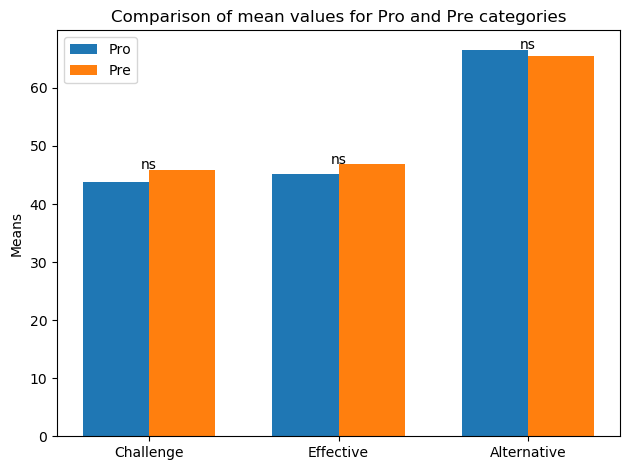

In [8]:

# Calculate mean for each *_pro and *_pre category
mean_challenge_pro, _ = calc_mean_std(challenge_pro)
mean_challenge_pre, _ = calc_mean_std(challenge_pre)
mean_effective_pro, _ = calc_mean_std(effective_pro)
mean_effective_pre, _ = calc_mean_std(effective_pre)
mean_alternative_pro, _ = calc_mean_std(alternative_pro)
mean_alternative_pre, _ = calc_mean_std(alternative_pre)

# Perform t-tests
_, p_challenge = ttest_ind(challenge_pro, challenge_pre)
_, p_effective = ttest_ind(effective_pro, effective_pre)
_, p_alternative = ttest_ind(alternative_pro, alternative_pre)

# Create the bar plot
labels = ['Challenge', 'Effective', 'Alternative']
pro_means = [np.mean(mean_challenge_pro), np.mean(mean_effective_pro), np.mean(mean_alternative_pro)]
pre_means = [np.mean(mean_challenge_pre), np.mean(mean_effective_pre), np.mean(mean_alternative_pre)]
p_values = [p_challenge, p_effective, p_alternative]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, pro_means, width, label='Pro')
rects2 = ax.bar(x + width/2, pre_means, width, label='Pre')

# Add significance indicators
for i, p_value in enumerate(p_values):
    print(p_value)
    if p_value < 0.1:
        ax.text(x[i], max(pro_means[i], pre_means[i]) + 0.1, '*', ha='center')
    else:
        ax.text(x[i], max(pro_means[i], pre_means[i]) + 0.1, 'ns', ha='center')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Comparison of mean values for Pro and Pre categories')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np
categories = ['Perfect', 'Imperfect', 'Non Recoverable', 'Recoverable', 'Error']
pro_data = [perfect_pro, imperfect_pro, non_recover_pro, recover_pro, error_pro]
pre_data = [perfect_pre, imperfect_pre, non_recover_pre, recover_pre, error_pre]

for i, category in enumerate(categories):
    mean_pro = np.mean(pro_data[i], axis=0)
    mean_pre = np.mean(pre_data[i], axis=0)
    
    if len(mean_pro) >= 2 and len(mean_pre) >= 2:
        pearson_corr, _ = pearsonr(mean_pro, mean_pre)
        spearman_corr, _ = spearmanr(mean_pro, mean_pre)
        kendall_corr, _ = kendalltau(mean_pro, mean_pre)
        
        print(f"{category} Correlations:")
        print(f"  Pearson correlation: {pearson_corr}")
        print(f"  Spearman correlation: {spearman_corr}")
        print(f"  Kendall correlation: {kendall_corr}")
    else:
        print(f"The lengths of mean_pro and mean_pre for {category} must be at least 2 for correlation calculations.")

Perfect Correlations:
  Pearson correlation: 0.8561394398490421
  Spearman correlation: 0.8857142857142855
  Kendall correlation: 0.7333333333333334
Imperfect Correlations:
  Pearson correlation: -0.3661603728984877
  Spearman correlation: -0.6273460950094357
  Kendall correlation: -0.44019642635179784
Non Recoverable Correlations:
  Pearson correlation: -0.3748338289043899
  Spearman correlation: -0.07864167572767856
  Kendall correlation: -0.11483385035264293
Recoverable Correlations:
  Pearson correlation: -0.23948718508682806
  Spearman correlation: -0.44685242518059853
  Kendall correlation: -0.25490196078431376
Error Correlations:
  Pearson correlation: 0.968895682488285
  Spearman correlation: 0.9214285714285713
  Kendall correlation: 0.8095238095238096


In [10]:
pro = np.concatenate([mean_perfect_pro, mean_imperfect_pro, mean_non_recover_pro, mean_recover_pro, mean_error_pro])
pre = np.concatenate([mean_perfect_pre, mean_imperfect_pre, mean_non_recover_pre, mean_recover_pre, mean_error_pre])



pearson_corr, _ = pearsonr(pro, pre)
spearman_corr, _ = spearmanr(pro, pre)
kendall_corr, _ = kendalltau(pro, pre)

print(f"Overall Correlations:")
print(f"  Pearson correlation: {pearson_corr}")
print(f"  Spearman correlation: {spearman_corr}")
print(f"  Kendall correlation: {kendall_corr}")


Overall Correlations:
  Pearson correlation: 0.38189553722624636
  Spearman correlation: 0.3096854965139358
  Kendall correlation: 0.22625796427470737
